In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# harris corner detection

In [2]:
class harris_corner_detection():
    def __init__(self, derivative = 'central', window_size = 3, threshold = 1200):
        self.derivative = derivative
        self.threshold = threshold
        self.window_size = window_size
    def __grad(self, img):
        img = np.float32(img)
        self.shape = img.shape
        dx = np.zeros(self.shape)
        dy = np.zeros(self.shape)
        
        dx[:,0] = img[:,1] - img[:,0]
        dx[:,-1] = img[:,-2] - img[:,-1]
        dy[0,:] = img[1,:] - img[0,:]
        dy[-1,:] = img[-2,:] - img[-1,:]
        
        if self.derivative == 'central':
            dx[:,1:-1] = (img[:,2:] - img[:,:-2]) / 2
            dy[1:-1,:] = (img[2:,:] - img[:-2,:]) / 2
        elif self.derivative == 'forward':
            dx[:,1:-1] = img[:,2:] - img[:,1:-1]
            dy[1:-1,:] = img[2:,:] - img[1:-1,:]
        elif self.derivative == 'backward':
            dx[:,1:-1] = img[:,1:-1] - img[:,:-2]
            dy[1:-1,:] = img[1:-1,:] - img[:-2,:]
        else:
            return print('There are currently only 3 ways to calculate differential: "central", "forward", "backward".')
        return dx, dy
    def apply(self, img):
        self.img = img
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        dx, dy = self.__grad(gray)
        Ixx = dx**2
        Iyy = dy**2
        Ixy = dx * dy
        
        f = np.zeros(self.shape)
        y_shape, x_shape = self.shape
        for y in range(y_shape):
            for x in range(x_shape):
                if (y < y_shape - self.window_size) & (x < x_shape - self.window_size):
                    Hxx = Ixx[y:y+self.window_size, x:x+self.window_size].sum(axis=(0,1))
                    Hyy = Iyy[y:y+self.window_size, x:x+self.window_size].sum(axis=(0,1))
                    Hxy = Ixy[y:y+self.window_size, x:x+self.window_size].sum(axis=(0,1))
                
                else:
                    Hxx = Ixx[y-self.window_size+1:y+1, x-self.window_size+1:x+1].sum(axis=(0,1))
                    Hyy = Iyy[y-self.window_size+1:y+1, x-self.window_size+1:x+1].sum(axis=(0,1))
                    Hxy = Ixy[y-self.window_size+1:y+1, x-self.window_size+1:x+1].sum(axis=(0,1))
                    
                det = Hxx * Hyy - Hxy ** 2
                tr = Hxx + Hyy
                f[y, x] = det / tr if tr != 0 else 0
            
        self.red_img = img.copy()
        self.red_img[f > self.threshold,:] = np.array([0,0,255])

        self.f_img = gray.copy()
        self.f_img[f <= self.threshold] = 0
        self.f_img[f > self.threshold] = 255

        return self
    def plot(self):
        plt.figure(figsize = (20,18))
        plt.subplot(1,3,1)
        plt.imshow(cv2.cvtColor(self.img , cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Original Image')
        plt.subplot(1,3,2)
        plt.imshow(self.f_img, cmap ='gray')
        plt.axis('off')
        plt.title('Different way = {}, window size = {}, threshold ={}'.format(self.derivative, self.window_size, self.threshold))
        plt.subplot(1,3,3)
        plt.imshow(cv2.cvtColor(self.red_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Features in Image')
        plt.show()
        
        return self

In [3]:
animal = cv2.imread('animal.jpg')

In [4]:
harris_cent_5_1200 = harris_corner_detection(derivative='central', window_size = 5, threshold=1200)
harris_cent_5_1800 = harris_corner_detection(derivative='central', window_size = 5, threshold=1800)
harris_cent_7_1200 = harris_corner_detection(derivative='central', window_size = 7, threshold=1200)
harris_cent_7_1800 = harris_corner_detection(derivative='central', window_size = 7, threshold=1800)
harris_for_5_1200 = harris_corner_detection(derivative='forward',window_size = 5, threshold=1200)
harris_for_5_1800 = harris_corner_detection(derivative='forward',window_size = 5, threshold=1800)
harris_for_7_1200 = harris_corner_detection(derivative='forward',window_size = 7, threshold=1200)
harris_for_7_1800 = harris_corner_detection(derivative='forward',window_size = 7, threshold=1800)

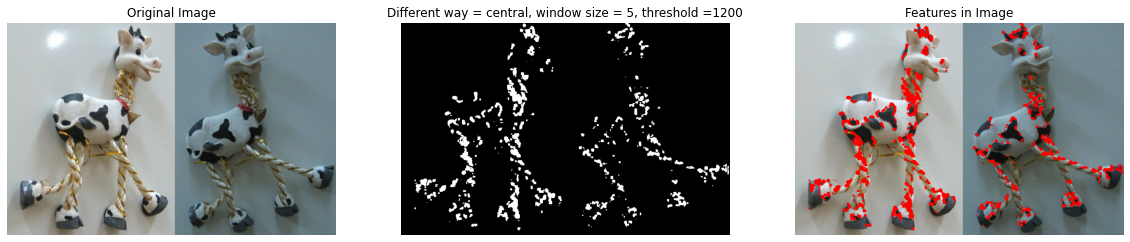

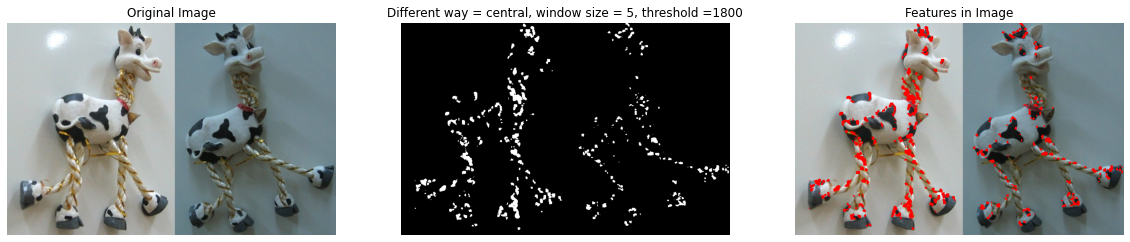

In [5]:
harris_cent_5_1200.apply(animal).plot()
harris_cent_5_1800.apply(animal).plot()

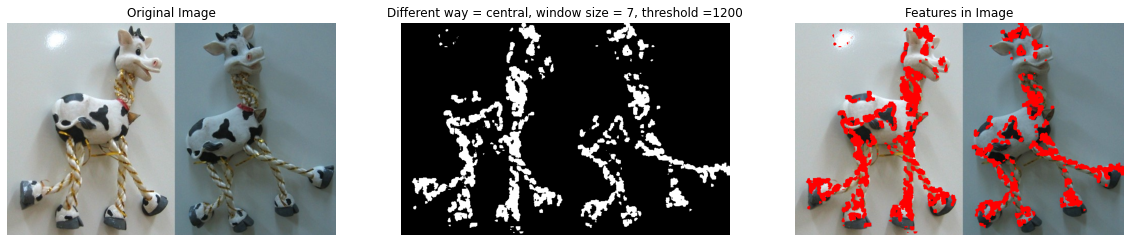

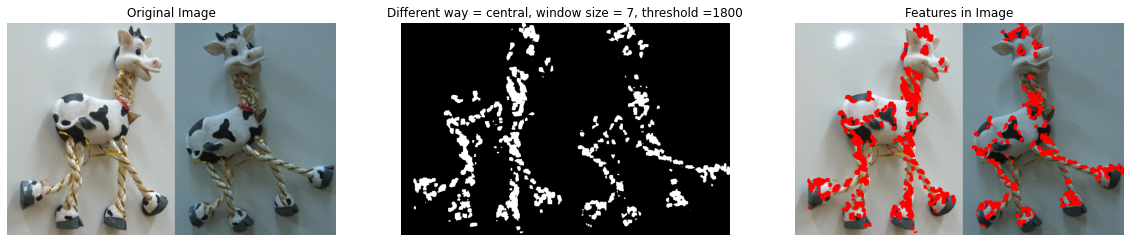

In [6]:
harris_cent_7_1200.apply(animal).plot()
harris_cent_7_1800.apply(animal).plot()

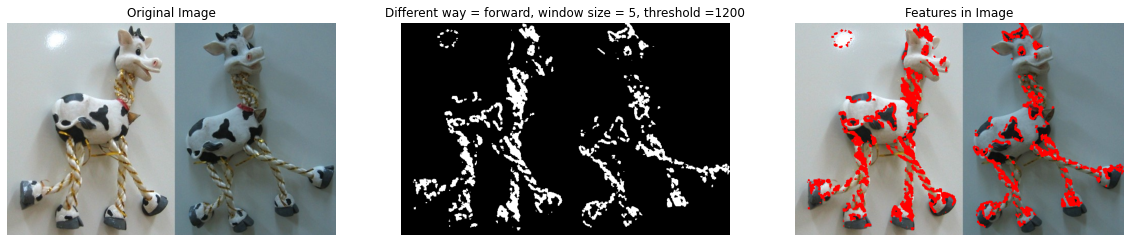

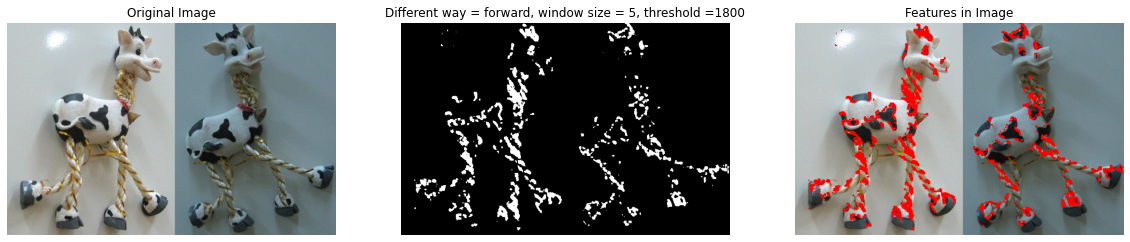

In [7]:
harris_for_5_1200.apply(animal).plot()
harris_for_5_1800.apply(animal).plot()

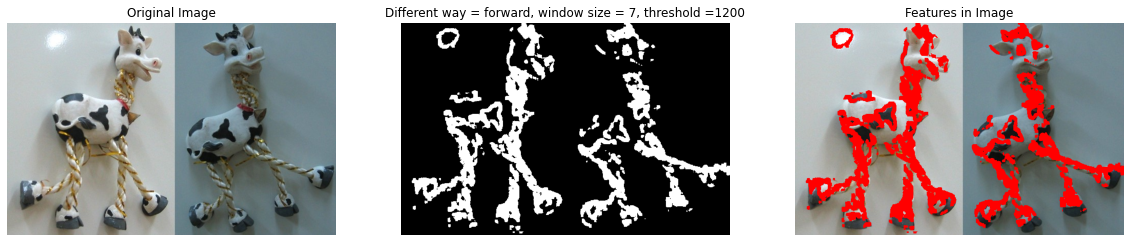

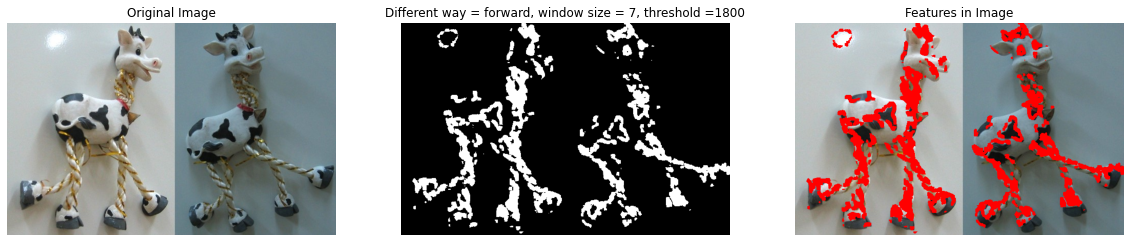

In [8]:
harris_for_7_1200.apply(animal).plot()
harris_for_7_1800.apply(animal).plot()